# TASK I: DATA PREPARATION

In [268]:
import numpy as np
import pandas as pd
import copy


### Data Load

In [269]:
def read_data(data):
  """
  Function to read data and clean duplicates and null values

  Parameters
  ---------
  data: DataFrame

  Returns
  ---------
  drop_dupl_na: DataFrame
    Data without duplicates and null values
  """
  data         = pd.read_csv(data)
  n_dupl       = data.duplicated().sum()
  n_Na         = data.isna().sum().sum()
  drop_dupl_na = data.drop_duplicates(keep='last').dropna()

  print(f'Data shape raw            : {data.shape}')
  print(f'Number of duplicate       : {n_dupl}')
  print(f'Number of na values       : {n_Na}')
  print(f'Data shape after dropping : {drop_dupl_na.shape}')

  return drop_dupl_na

data = read_data(data = 'credit_risk_dataset.csv')

Data shape raw            : (32581, 12)
Number of duplicate       : 165
Number of na values       : 4011
Data shape after dropping : (28501, 12)


In [270]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Data Splitting

In [271]:
# input and output data splitting

def split_input_output(data, target_col):
  """
  Function to split data into input (X) and output (y)

  Parameters
  ---------
  data      : DataFrame
  target_col: str

  Returns
  ---------
  X, y: DataFrame
    X is the input and y is the output
  """
  X = data.drop(target_col, axis = 1)
  y = data[target_col]
  print('X shape :', X.shape)
  print('y shape :', y.shape)

  return X, y

X, y = split_input_output(data = copy.deepcopy(data), target_col = 'loan_status')

X shape : (28501, 11)
y shape : (28501,)


In [272]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [273]:
y.head()
y.value_counts(normalize = True)

0    0.782885
1    0.217115
Name: loan_status, dtype: float64

In [274]:
# train, test (and valid) data splitting

from sklearn.model_selection import train_test_split

def split_train_test(X, y, test_size, seed):
  """
  Function to split data X and y into train and test data (which is then further split into valid data)

  Parameters
  ---------
  X, y     : DataFrame
  test_size: float
  seed     : int

  Returns
  ---------
  X_train, X_test, y_train, y_test: DataFrame
    X and y (train and test) data
  """
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, stratify = y)
  print('X train shape:', X_train.shape)
  print('y train shape:', y_train.shape)
  print('X test shape :', X_test.shape)
  print('y test shape :', y_test.shape)
  print()

  return X_train, X_test, y_train, y_test



In [275]:
# Splitting X and y into train and not_train data
X_train, X_not_train, y_train, y_not_train = split_train_test(X, y, test_size = 0.2, seed = 123)

# Separating not_train data into validation and test data
X_valid, X_test, y_valid, y_test           = split_train_test(X = X_not_train,
                                                              y = y_not_train,
                                                              test_size = 0.5,
                                                              seed = 123)

X train shape: (22800, 11)
y train shape: (22800,)
X test shape : (5701, 11)
y test shape : (5701,)

X train shape: (2850, 11)
y train shape: (2850,)
X test shape : (2851, 11)
y test shape : (2851,)



In [276]:
print(len(X_train)/len(X))  # 0.8
print(len(X_valid)/len(X))  # 0.1
print(len(X_test)/len(X))   # 0.1

0.7999719308094453
0.09999649135118066
0.10003157783937405


### Performing EDA

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [277]:
def plotting_function(data, numerical, categorical):
    """
    Function to display numerical and categorical data in plot

    Parameters
    ---------
    data  : DataFrame
    hue   : str
    colors: str
 
    Returns
    ---------
    -
    """
    data_num_train = data.select_dtypes(exclude = ['object'])
    data_cat_train = data.select_dtypes(include = ['object'])
    if numerical: 
        fig, ax    = plt.subplots(nrows = 3, ncols = 3, figsize = (12, 8))
        axes       = ax.flatten()
        for i, col in enumerate(data_num_train.columns):
            sns.kdeplot(data_num_train[col], ax = axes[i])
            axes[i].set_title(f'Distribution of {col}')
    else:
        fig, axes  = plt.subplots(nrows = 1, ncols = len(data_cat_train.columns), figsize = (12, 6))
        for i, col in enumerate(data_cat_train.columns):
            data_cat_train[col].value_counts().plot(kind = 'bar', ax = axes[i])
            axes[i].set_title(col)
    plt.tight_layout()
    plt.show()
        

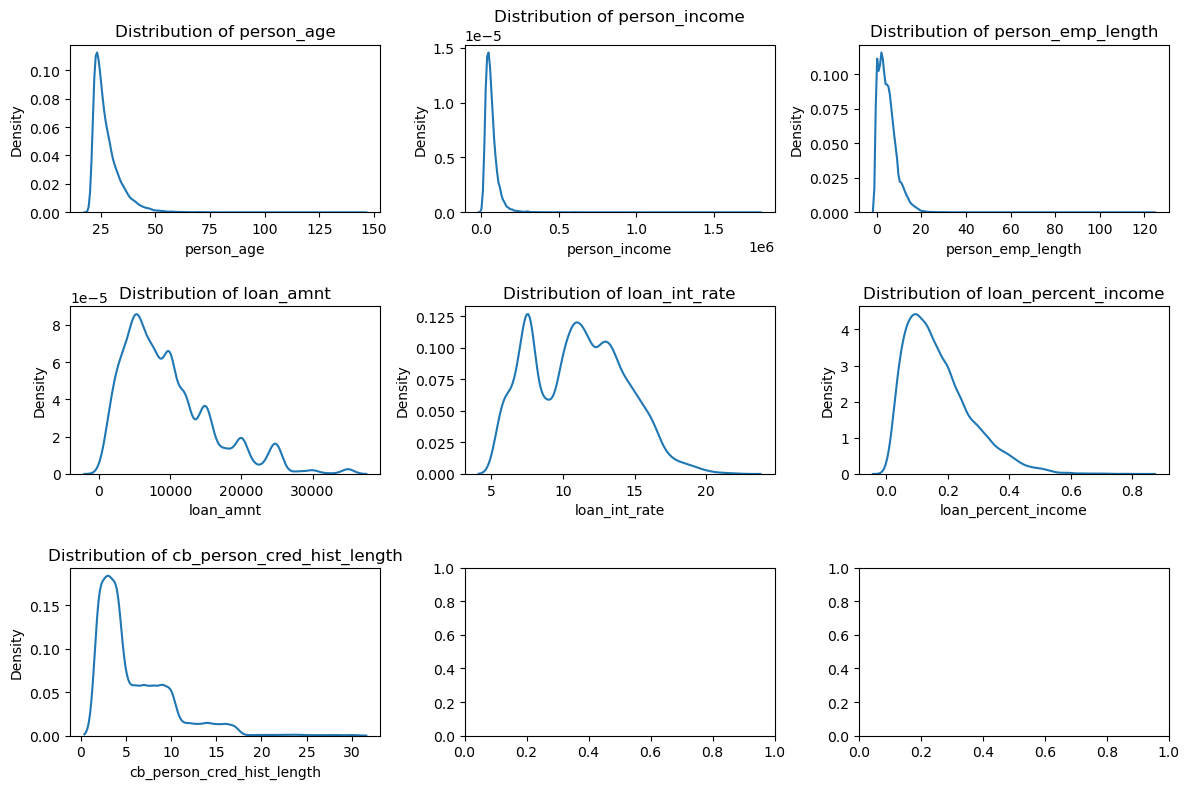

In [278]:
# Calling the plotting_function to print the plot of numerical data
data_num_train = plotting_function(data = X_train, numerical = True, categorical = False)
data_num_train

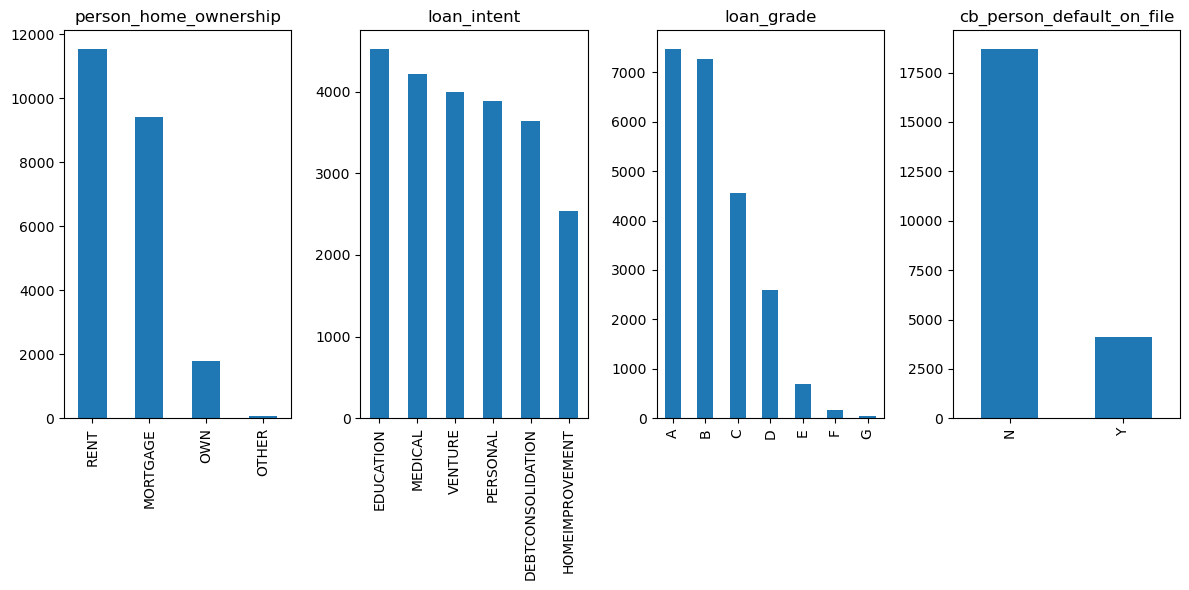

In [279]:
# Calling the plotting_function to print the plot of categorical data
data_cat_train = plotting_function(data = X_train, numerical = False, categorical = True)
data_cat_train

In [223]:
# outlier checking
X_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,22800.000000,2.280000e+04,22800.000000,22800.000000,22800.000000,22800.000000,22800.000000
mean,27.687982,6.639646e+04,4.779167,9662.725877,11.050832,0.169453,5.774254
std,6.222945,5.090576e+04,4.084630,6348.350669,3.227863,0.106334,4.032953
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.569600e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,144.000000,1.782000e+06,123.000000,35000.000000,22.480000,0.830000,30.000000


In [280]:
X_train[X_train['person_age'] > 65].sort_values(by = 'person_age', ascending = False)


# 65 is the average retirement age worldwide
# Looking at data for customers above 65 years old

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0.02,N,3
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0.25,N,3
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0.11,N,24
32534,76,75000,RENT,23.0,MEDICAL,A,15000,8.94,0.20,N,25
32521,73,39240,RENT,0.0,MEDICAL,B,1800,12.53,0.05,N,21
32383,70,30000,RENT,1.0,MEDICAL,B,5000,10.96,0.17,N,28
32436,70,42000,RENT,1.0,MEDICAL,B,8000,9.63,0.19,N,24
32385,70,44000,MORTGAGE,3.0,PERSONAL,C,7000,11.66,0.16,N,24
32522,70,48000,RENT,0.0,MEDICAL,A,15000,6.99,0.31,N,24
32400,69,24000,RENT,3.0,MEDICAL,A,6000,6.62,0.25,N,20


In [281]:
X_train[X_train['person_emp_length'] > 45].sort_values(by = 'person_emp_length', ascending = False)

# 45 years is the average work tenure worldwide
# Looking at data for customers with work tenure above 45 years

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3


Comment:
1. The numerical data is skewed and the distribution of categorical data is imbalanced. Appropriate ML techniques are needed to address this.
2. There are outliers, which are also anomalous data points, namely person_age == 123 and 144 and person_emp_length == 123.
3. The categorical columns 'loan_grade' & 'cb_person_default_on_file' are numerically encoded with label encoding, the rest are encoded using One Hot.

Conclusion:
1. Removing outlier data based on assumptions.
2. Scaling the data to balance the data.


### Data Preprocessing

In [234]:
# removing the outliers
person_outlier     = X_train[(X_train['person_age'] > 65) | (X_train['person_emp_length'] > 45)].index
X_train_dropped    = X_train.drop(person_outlier)
y_train_dropped    = y_train.drop(person_outlier)

print('Shape of X train after dropped:', X_train_dropped.shape)
print('Shape of y train after dropped:', y_train_dropped.shape)

Shape of X train after dropped: (22778, 11)
Shape of y train after dropped: (22778,)


In [227]:
X_train_dropped.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,22778.000000,2.277800e+04,22778.000000,22778.000000,22778.000000,22778.000000,22778.000000
mean,27.644086,6.638831e+04,4.773466,9659.753929,11.050893,0.169407,5.759285
std,6.024476,5.088573e+04,4.006685,6344.697180,3.227579,0.106291,3.998711
min,20.000000,4.080000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.570400e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,65.000000,1.782000e+06,38.000000,35000.000000,22.480000,0.830000,30.000000


In [228]:
# Inserting categorical values with 'UNKNOWN'

from sklearn.impute import SimpleImputer


def cat_imputer_fit(data):
  """
  Function to perform fit imputation on data

  Parameters
  ---------
  data: DataFrame

  Returns
  imputer
     instance of SimpleImputer class
  """
  imputer     = SimpleImputer(strategy = 'constant', fill_value='UNKOWN')
  imputer     = imputer.fit(data)

  return imputer

def cat_imputer_transform(data, imputer):
  """
  Function to perform transform imputation on data

  Parameters
  ---------
  data   : DataFrame
  imputer: inscance

  Returns
  imputed_data
     DataFrame
  """
  imputing_data = imputer.transform(data)
  imputed_data  = pd.DataFrame(imputing_data)

  imputed_data.columns = data.columns
  imputed_data.index   = data.index

  return imputed_data

# Saving columns with categorical values to variable X_train_cat
X_train_cat = X_train_dropped.select_dtypes(['object'])

# Perform categorical imputation
cat_imputer = cat_imputer_fit(data = X_train_cat)

# Transform
X_train_dropped[X_train_cat.columns] = cat_imputer_transform(data = X_train_cat, imputer = cat_imputer)


In [235]:
from sklearn.preprocessing import LabelEncoder

def apply_label_encoding(data, columns):
  """
  Function to perform label encoding

  Parameters
  ---------
  data   : DataFrame
  columns: list

  Returns
  data
     DataFrame
  """
  for col in columns:
      encoder = LabelEncoder()
      data[col+'_encoded'] = encoder.fit_transform(data[col])
  data.drop(columns, axis=1, inplace=True)
  return data

# Specify the columns to be encoded as labels
labels_encoding_col  = ['loan_grade', 'cb_person_default_on_file']

# Apply label encoding
X_train_dropped_encoded_label = apply_label_encoding(data = X_train_dropped, columns = labels_encoding_col)


In [236]:
X_train_dropped_encoded_label.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade_encoded,cb_person_default_on_file_encoded
26365,31,100000,MORTGAGE,0.0,VENTURE,20000,13.48,0.20,6,2,1
20813,28,43000,MORTGAGE,12.0,HOMEIMPROVEMENT,8000,9.32,0.19,10,0,0
24242,33,70000,MORTGAGE,3.0,VENTURE,20000,12.84,0.29,7,2,1
3206,23,48562,RENT,4.0,VENTURE,3500,8.00,0.07,2,0,0
26026,33,95000,MORTGAGE,17.0,MEDICAL,12000,7.29,0.13,6,0,0


In [237]:
# Check the result of label encoding
X_train_dropped_encoded_label[['loan_grade_encoded']].value_counts()

loan_grade_encoded
0                     7466
1                     7255
2                     4554
3                     2597
4                      694
5                      168
6                       44
dtype: int64

In [238]:
# Check the result of label encoding
X_train_dropped_encoded_label[['cb_person_default_on_file_encoded']].value_counts()

cb_person_default_on_file_encoded
0                                    18689
1                                     4089
dtype: int64

In [239]:
from sklearn.preprocessing import OneHotEncoder

def apply_oneHot_encoding(data, columns):
  """
  Function to perform OneHot encoding

  Parameters
  ---------
  data   : DataFrame
  columns: list

  Returns
  data
     DataFrame
  """
  for col in columns:
      encoder = OneHotEncoder()
      encoded_cols = encoder.fit_transform(data[[col]])
      feature_names = encoder.get_feature_names_out([col])
      encoded_data = pd.DataFrame(encoded_cols.toarray(), columns=feature_names, index=data.index)
      data = pd.concat([data, encoded_data], axis=1)
      data.drop(col, axis=1, inplace=True)
  return data

# Specify the columns to be one-hot encoded
oneHot_encoding_col = ['person_home_ownership', 'loan_intent']

# Apply one-hot encoding
X_train_dropped_encoded_Ohe = apply_oneHot_encoding(data=X_train_dropped_encoded_label, columns=oneHot_encoding_col)


In [240]:
X_train_dropped_encoded_Ohe.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade_encoded,cb_person_default_on_file_encoded,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
26365,31,100000,0.0,20000,13.48,0.20,6,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20813,28,43000,12.0,8000,9.32,0.19,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24242,33,70000,3.0,20000,12.84,0.29,7,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3206,23,48562,4.0,3500,8.00,0.07,2,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
26026,33,95000,17.0,12000,7.29,0.13,6,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [241]:
# Scaling numerical values

from sklearn.preprocessing import StandardScaler

def fit_scaler(data):
  """
  Function to perform fit scaling on data

  Parameters
  ---------
  data: DataFrame

  Returns
  standardizer
     transformer
  """
  standardizer = StandardScaler()
  standardizer.fit(data)
  return standardizer

def transform_scaler(data, scaler):
  """
  Function to perform transform scaling on data

  Parameters
  ---------
  data: DataFrame

  Returns
  scaler
     object
  """
  scaled_data_raw = scaler.transform(data)
  scaled_data     = pd.DataFrame(scaled_data_raw)

  scaled_data.columns = data.columns
  scaled_data.index   = data.index

  return scaled_data

# Fit scaler
scaler = fit_scaler(data = X_train_dropped_encoded_Ohe)

# Transform scaler
X_train_clean = transform_scaler(data = X_train_dropped_encoded_Ohe, scaler = scaler)


In [242]:
X_train_clean.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade_encoded,cb_person_default_on_file_encoded,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
count,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04,2.277800e+04
mean,-1.260248e-16,1.344472e-16,2.807483e-18,-2.620317e-17,6.800348e-17,-4.554361e-17,4.367196e-17,6.363628e-17,6.363628e-17,-2.370763e-17,4.491973e-17,7.174679e-18,-1.010694e-16,4.055253e-17,-3.618534e-17,4.460778e-17,-7.798564e-17,1.559713e-18,1.575310e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-1.268866e+00,-1.224502e+00,-1.191402e+00,-1.443718e+00,-1.744656e+00,-1.593841e+00,-9.401449e-01,-1.051107e+00,-4.677519e-01,-8.375568e-01,-5.785951e-02,-2.918620e-01,-1.011836e+00,-4.359738e-01,-4.976941e-01,-3.537978e-01,-4.758886e-01,-4.533960e-01,-4.611158e-01
25%,-7.708866e-01,-5.284172e-01,-6.922248e-01,-7.344490e-01,-9.762618e-01,-7.470884e-01,-6.900588e-01,-1.051107e+00,-4.677519e-01,-8.375568e-01,-5.785951e-02,-2.918620e-01,-1.011836e+00,-4.359738e-01,-4.976941e-01,-3.537978e-01,-4.758886e-01,-4.533960e-01,-4.611158e-01
50%,-2.729071e-01,-2.099712e-01,-1.930480e-01,-2.616028e-01,-1.886687e-02,-1.825869e-01,-4.399728e-01,-1.970685e-01,-4.677519e-01,-8.375568e-01,-5.785951e-02,-2.918620e-01,9.883027e-01,-4.359738e-01,-4.976941e-01,-3.537978e-01,-4.758886e-01,-4.533960e-01,-4.611158e-01
75%,3.910656e-01,2.675012e-01,5.557171e-01,4.476665e-01,7.526261e-01,5.700818e-01,5.603716e-01,6.569700e-01,-4.677519e-01,1.193949e+00,-5.785951e-02,-2.918620e-01,9.883027e-01,-4.359738e-01,-4.976941e-01,-3.537978e-01,-4.758886e-01,-4.533960e-01,-4.611158e-01
max,6.200827e+00,3.371572e+01,8.292957e+00,3.994013e+00,3.541155e+00,6.215097e+00,6.062265e+00,4.073124e+00,2.137886e+00,1.193949e+00,1.728324e+01,3.426277e+00,9.883027e-01,2.293716e+00,2.009266e+00,2.826473e+00,2.101332e+00,2.205578e+00,2.168653e+00


In [243]:
X_train_clean.shape

(22778, 19)

### Preprocessing X_valid and X_test

In [244]:
def preprocessing_data(data, label_cols, ohe_cols):
  """
  Function to perform preprocessing including categorical imputation, label encoding, OneHot encoding, and scaling

  Parameters
  ---------
  data      : DataFrame
  label_cols: list
  ohe_cols  : list

  Returns
  data_clean
     DataFrame
  """
  # IMPUTATION
  data_cat = data.select_dtypes(['object'])

  # Perform categorical imputation
  cat_imputer = cat_imputer_fit(data_cat)

  # Transform
  data[data_cat.columns] = cat_imputer_transform(data_cat, cat_imputer)

  # Apply label encoding
  data_encoded_label = apply_label_encoding(data, label_cols)

  # Apply one-hot encoding
  data_encoded_Ohe = apply_oneHot_encoding(data_encoded_label, ohe_cols)

  # SCALING
  # Fit scaler
  scaler = fit_scaler(data = data_encoded_Ohe)

  # Transform scaler
  data_clean = transform_scaler(data = data_encoded_Ohe, scaler = scaler)

  return data_clean

In [245]:
# preprocessing data X_valid
X_valid_clean = preprocessing_data(X_valid, labels_encoding_col, oneHot_encoding_col)


In [246]:
X_valid_clean.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade_encoded,cb_person_default_on_file_encoded,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
count,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03,2.850000e+03
mean,-1.508345e-16,1.047116e-16,8.975277e-17,-1.427318e-16,1.290196e-16,7.323576e-17,1.558208e-17,6.856114e-18,5.858861e-17,-2.493132e-17,1.994506e-17,3.490385e-17,2.430804e-17,1.745193e-17,7.479397e-18,-6.980771e-17,1.495879e-17,-2.243819e-17,8.975277e-17
std,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00
min,-1.269221e+00,-1.073620e+00,-1.032990e+00,-1.414625e+00,-1.714345e+00,-1.590671e+00,-9.802133e-01,-1.048473e+00,-4.635016e-01,-8.327092e-01,-4.593152e-02,-2.739818e-01,-1.037911e+00,-4.347255e-01,-4.967083e-01,-3.581425e-01,-4.713034e-01,-4.517253e-01,-4.657345e-01
25%,-7.845259e-01,-4.626263e-01,-6.147455e-01,-7.376624e-01,-9.651028e-01,-7.476460e-01,-7.265027e-01,-1.048473e+00,-4.635016e-01,-8.327092e-01,-4.593152e-02,-2.739818e-01,-1.037911e+00,-4.347255e-01,-4.967083e-01,-3.581425e-01,-4.713034e-01,-4.517253e-01,-4.657345e-01
50%,-2.998307e-01,-1.889851e-01,-1.965014e-01,-2.626008e-01,-1.948687e-02,-1.856297e-01,-4.727920e-01,-2.158879e-01,-4.635016e-01,-8.327092e-01,-4.593152e-02,-2.739818e-01,9.634736e-01,-4.347255e-01,-4.967083e-01,-3.581425e-01,-4.713034e-01,-4.517253e-01,-4.657345e-01
75%,5.079946e-01,2.193078e-01,4.308648e-01,3.708148e-01,7.237129e-01,5.637254e-01,5.420506e-01,6.166973e-01,-4.635016e-01,1.200899e+00,-4.593152e-02,-2.739818e-01,9.634736e-01,-4.347255e-01,-4.967083e-01,-3.581425e-01,-4.713034e-01,-4.517253e-01,-4.657345e-01
max,8.424682e+00,3.355955e+01,2.468902e+01,4.012954e+00,3.663280e+00,4.497840e+00,5.362553e+00,3.947038e+00,2.157490e+00,1.200899e+00,2.177154e+01,3.649878e+00,9.634736e-01,2.300302e+00,2.013254e+00,2.792185e+00,2.121775e+00,2.213735e+00,2.147146e+00


In [247]:
# preprocessing data X_test
X_test_clean  = preprocessing_data(X_test, labels_encoding_col, oneHot_encoding_col)

In [248]:
X_test_clean.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade_encoded,cb_person_default_on_file_encoded,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
count,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03,2.851000e+03
mean,-5.607580e-17,-1.744581e-17,-2.741484e-17,-1.370742e-16,-2.635563e-16,4.112226e-17,1.246129e-18,1.302205e-16,5.358355e-17,-1.059210e-16,1.495355e-17,-8.286758e-17,-8.847516e-17,4.984516e-17,-4.486064e-17,-1.744581e-17,2.990710e-17,-5.732193e-17,-2.616871e-17
std,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00,1.000175e+00
min,-1.127236e+00,-5.231910e-01,-1.164868e+00,-1.392849e+00,-1.744612e+00,-1.591088e+00,-9.381165e-01,-1.043313e+00,-4.561259e-01,-8.360900e-01,-6.223536e-02,-2.649438e-01,-1.038992e+00,-4.357750e-01,-5.064589e-01,-3.611814e-01,-4.795202e-01,-4.533176e-01,-4.420270e-01
25%,-5.655144e-01,-2.412454e-01,-6.721690e-01,-7.469062e-01,-9.626027e-01,-7.473719e-01,-7.004614e-01,-1.043313e+00,-4.561259e-01,-8.360900e-01,-6.223536e-02,-2.649438e-01,-1.038992e+00,-4.357750e-01,-5.064589e-01,-3.611814e-01,-4.795202e-01,-4.533176e-01,-4.420270e-01
50%,-2.846536e-01,-1.010641e-01,-1.794697e-01,-2.624495e-01,1.175589e-02,-1.848947e-01,-4.628064e-01,-1.707741e-01,-4.561259e-01,-8.360900e-01,-6.223536e-02,-2.649438e-01,9.624715e-01,-4.357750e-01,-5.064589e-01,-3.611814e-01,-4.795202e-01,-4.533176e-01,-4.420270e-01
75%,2.770681e-01,8.027142e-02,5.595792e-01,4.642356e-01,7.149338e-01,5.650748e-01,4.878139e-01,7.017652e-01,-4.561259e-01,1.196043e+00,-6.223536e-02,-2.649438e-01,9.624715e-01,-4.357750e-01,-5.064589e-01,-3.611814e-01,-4.795202e-01,-4.533176e-01,-4.420270e-01
max,1.628613e+01,4.890137e+01,6.471971e+00,4.097661e+00,3.401515e+00,4.689907e+00,5.716225e+00,4.191922e+00,2.192377e+00,1.196043e+00,1.606804e+01,3.774386e+00,9.624715e-01,2.294762e+00,1.974494e+00,2.768692e+00,2.085418e+00,2.205959e+00,2.262305e+00


# TASK II: MODELING

In [249]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [250]:
def extract_cv_results(cv_obj):
  """
  Function to extract scores data after cross-validation process

  Parameters
  ---------
  cv_obj: object

  Returns
  train_score, valid_score, best_params
     numerik, numerik, str
  """
  train_score = cv_obj.cv_results_['mean_train_score'][cv_obj.best_index_]
  valid_score = cv_obj.cv_results_['mean_test_score'][cv_obj.best_index_]
  best_params = cv_obj.best_params_

  return train_score, valid_score, best_params

Comment:

The selected classification algorithms are as follows: DummyClassifier as the baseline, followed by Logistic Regression, Decision Tree, and Random Forest. The chosen evaluation metric is 'roc_auc'. This metric is selected because it can address the business case in credit risk analysis, which seems to emphasize anticipating the emergence of false positive applicants.

### Baseline Model

In [251]:
# create dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

param_grid_baseline = {}
reg_base = GridSearchCV(estimator=dummy_clf, param_grid=param_grid_baseline, cv=10, scoring='roc_auc', return_train_score=True)

reg_base.fit(X_train_clean, y_train_dropped)

# extraction of the cross-validation process and printing the results
train_reg_base, valid_reg_base, best_param_reg_base = extract_cv_results(reg_base)
print(f'Train score - Logistic Regression: {train_reg_base}')
print(f'Valid score - Logistic Regression: {valid_reg_base}')
print(f'Best Params - Logistic Regression: {best_param_reg_base}')


Train score - Logistic Regression: 0.5
Valid score - Logistic Regression: 0.5
Best Params - Logistic Regression: {}


### Logistic Regression

Comment:

The following parameters are used because:
1. 'penalty': 
L1 (Lasso) serves as a method for feature selection, and L2 (Ridge) is used to help prevent overfitting.

2. 'C': 
This is the regularization strength, where smaller values are stronger and help prevent overfitting. Larger values allow the model to pay more attention to the training data.

3. solver: 
The 'liblinear' solver is suitable for datasets that are relatively small to medium in size. Additionally, this solver is suitable for handling both L1 (Lasso) and L2 (Ridge) regularization.

4. class_weight: 
This parameter ('balanced') provides balanced weights for each class in logistic regression. It is used to handle imbalanced data in y.

In [252]:
# defining the parameter
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C'      : [0.001, 0.01, 0.1, 1, 10]
}

# defining a LogisticRegression model with solver 'liblinear' and class_weight 'balanced'
logistic_model = LogisticRegression(
                                    solver       = 'liblinear',
                                    class_weight = 'balanced',
                                    random_state = 123)

# initializing GridSearchCV
reg_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid_logistic, cv=10, scoring= 'roc_auc', return_train_score=True)

# fit model
reg_logistic.fit(X_train_clean, y_train_dropped)

# extraction of the cross-validation process and printing the results
train_logistic, valid_logistic, best_param_logistic = extract_cv_results(reg_logistic)
print(f'Train score - Logistic Regression: {train_logistic}')
print(f'Valid score - Logistic Regression: {valid_logistic}')
print(f'Best Params - Logistic Regression: {best_param_logistic}')

Train score - Logistic Regression: 0.8649606116802332
Valid score - Logistic Regression: 0.8644138839490048
Best Params - Logistic Regression: {'C': 0.1, 'penalty': 'l1'}


### Decision Tree

Comment:

1. 'max_depth': 
This parameter limits the maximum depth of the decision tree. By limiting the depth, we can control the complexity of the model and prevent overfitting. Choosing a lower value can result in a more interpretable model but potentially less accuracy.

2. 'min_samples_split': 
This parameter determines the minimum number of samples required to split a node in the tree. By increasing this value, we direct the model to make more significant splits in the data, which can help reduce overfitting.

3. 'min_samples_leaf': 
This parameter determines the minimum number of samples required to be a leaf node in the tree. By increasing this value, we prevent the model from creating very small partitions, which can help reduce overfitting and make the model more general.

In [254]:
# defining the parameter
param_grid_tree = {
    'max_depth'        : [4, 6],
    'min_samples_split': [10, 15],
    'min_samples_leaf' : [2, 4]
}

# defining DecisionTreeClassifier
tree_model = DecisionTreeClassifier(class_weight='balanced')

# initializing GridSearchCV
reg_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=10, scoring= 'roc_auc', return_train_score=True)

# Fit model
reg_tree.fit(X_train_clean, y_train_dropped)

# extraction of the cross-validation process and printing the results
train_tree, valid_tree, best_param_tree = extract_cv_results(reg_tree)
print(f'Train score - DecisionTreeClassifier: {train_tree}')
print(f'Valid score - DecisionTreeClassifier: {valid_tree}')
print(f'Best Params - DecisionTreeClassifier: {best_param_tree}')



Train score - DecisionTreeClassifier: 0.9088796551909644
Valid score - DecisionTreeClassifier: 0.9054782907832557
Best Params - DecisionTreeClassifier: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}


### Random Forest

Comment:

1. 'n_estimators': 
The number of trees in the forest. The more trees, the better the generalization usually, but the longer it takes to train the model.

2. 'max_depth': 
The maximum depth of each tree in the forest.

In [255]:
# specify the range of values for n_estimators
B = [10, 15, 20, 25, 30, 35, 40]

# defining the parameter
param_grid_random = {"n_estimators": B, "max_depth": [2, 4, 6, 8]}

# defining RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=123)

# initializing GridSearchCV
rf_cv   = GridSearchCV(estimator=rf_model, param_grid=param_grid_random, cv=10, scoring= 'roc_auc', return_train_score=True)

# Fit model
rf_cv.fit(X_train_clean, y_train_dropped)

# extraction of the cross-validation process and printing the results
train_rf, valid_rf, best_param_rf = extract_cv_results(rf_cv)
print(f'Train score auc - RandomForestClassifier: {train_rf}')
print(f'Valid score auc - RandomForestClassifier: {valid_rf}')
print(f'Best Params     - RandomForestClassifier: {best_param_rf}')


Train score auc - RandomForestClassifier: 0.9375105014675673
Valid score auc - RandomForestClassifier: 0.9218848518903415
Best Params     - RandomForestClassifier: {'max_depth': 8, 'n_estimators': 40}


# TASK III: MODEL EVALUATION

In [256]:
# Summary of modeling results (model name, scoring type, and best parameters)
summary_df = pd.DataFrame(
    data={
        'model'      : ['Dummy Classifier', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
        'train_score': [train_reg_base, train_logistic, train_tree, train_rf],
        'valid_score': [valid_reg_base, valid_logistic, valid_tree, valid_rf],
        'best_params': [best_param_reg_base, best_param_logistic, best_param_tree, best_param_rf]
    }
)


summary_df['train_score'] /= 10**6
summary_df['valid_score'] /= 10**6
summary_df

,model,train_score,valid_score,best_params
0,Dummy Classifier,5.000000e-07,5.000000e-07,{}
1,Logistic Regression,8.649606e-07,8.644139e-07,"{'C': 0.1, 'penalty': 'l1'}"
2,Decision Tree,9.088797e-07,9.054783e-07,"{'max_depth': 6, 'min_samples_leaf': 2, 'min_s..."
3,Random Forest,9.375105e-07,9.218849e-07,"{'max_depth': 8, 'n_estimators': 40}"


Comment:

The best model selected is Random Forest, as it outperformed the Dummy Classifier, Logistic Regression, and Decision Tree in both training and validation scores.

The CV results show that the Random Forest model with the best parameters (max_depth=8, n_estimators=40) achieved an AUC score of around 0.9375 on the training data and 0.9219 on the validation data. These scores indicate good performance and suggest that the model can generally generalize well to unseen data.

Next, as an initial step in evaluating the model, a function is built to find the threshold and cost function. The goal is to see at which threshold the class division occurs and the cost function generated from false positive and false negative predictions, as emphasized in the question.

The question specifies the following:
- if you falsely predict good applicants as bad, you would lose potential revenue of Rp 10.000.000/applicant on average (I conclude that this refers to False Positive (good aplicants = 0, default/bad = 1))

- if you falsely predict bad applicants as good, you would lose Rp 35.000.000/applicant on average (I conclude that this refers to False Negative (good aplicants = 0, default/bad = 1))

The business case seems to emphasize false positives and false negatives. However, upon comparison, it appears that the business is more concerned with avoiding false negatives than false positives. This is evident from the potential loss of false negatives, which is higher at Rp 35,000,000/applicant compared to Rp 10,000,000/applicant for false positives.

### Threshold and Cost Function

In [257]:
def threshCost_function(cost_fp, cost_fn, thresholds, actual, pred_proba):

  """ 
  Function to find the class division threshold in the model and the resulting cost function

  Parameters
  ---------
  cost_fp   : int
  cost_fn   : int
  thresholds: float
  actual    : DataFrame
  pred_proba: DataFrame

  Returns
  best_threshold
    float
  min_cost
     int
  """
  # Initializing variables to store the best threshold and minimum cost
  best_threshold = None
  min_cost = float('inf')

  # iterating over threshold values
  for threshold in thresholds:
    # Converting prediction probabilities to binary predictions based on the threshold
    y_train_pred_binary = (pred_proba >= threshold).astype(int)

    # summing the number of false positives and false negatives
    fp = np.sum((actual == 0) & (y_train_pred_binary == 1))
    fn = np.sum((actual == 1) & (y_train_pred_binary == 0))

    # calculating the total_cost based on the threshold
    total_cost = cost_fp * fp + cost_fn * fn

    # updating the best threshold and minimum cost if the threshold has a minimum cost
    if total_cost < min_cost:
        min_cost = total_cost
        best_threshold = threshold

  # Printing the best threshold and minimum cost
  print(f'Best Threshold    : {best_threshold}')
  print(f'Minimum Cost      : {min_cost}')

  return best_threshold, min_cost


In [258]:
best_model = RandomForestClassifier(class_weight='balanced',
                                      max_depth   = rf_cv.best_params_['max_depth'],
                                      n_estimators= rf_cv.best_params_['n_estimators'],
                                      random_state=123)

best_model.fit(X_train_clean, y_train_dropped)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=40,
                       random_state=123)

In [259]:
# predicting probabilities on the training data
y_train_pred_proba = best_model.predict_proba(X_train_clean)[:, 1]

# define the range of threshold values
thresholds = np.linspace(0, 1, 100)

# define the total cost of false positives and false negatives
cost_fp = 10000000  # Cost false positives
cost_fn = 35000000  # Cost false negatives

threshold_and_cost = threshCost_function(cost_fp = cost_fp, cost_fn = cost_fn, thresholds = thresholds, actual = y_train_dropped, pred_proba = y_train_pred_proba)


Best Threshold    : 0.494949494949495
Minimum Cost      : 47720000000


In [260]:
# predicting probabilities on the valid data
y_valid_pred_proba = best_model.predict_proba(X_valid_clean)[:, 1]

# define the range of threshold values
thresholds = np.linspace(0, 1, 100)

# define the total cost of false positives and false negatives
cost_fp = 10000000  # Cost false positives
cost_fn = 35000000  # Cost false negatives

threshold_and_cost = threshCost_function(cost_fp = cost_fp, cost_fn = cost_fn, thresholds = thresholds, actual = y_valid, pred_proba = y_valid_pred_proba)


Best Threshold    : 0.393939393939394
Minimum Cost      : 6580000000


In [261]:
# predicting probabilities on the test data
y_test_pred_proba = best_model.predict_proba(X_test_clean)[:, 1]

# define the range of threshold values
thresholds = np.linspace(0, 1, 100)

# define the total cost of false positives and false negatives
cost_fp = 10000000  # Cost false positives
cost_fn = 35000000  # Cost false negatives

threshold_and_cost = threshCost_function(cost_fp = cost_fp, cost_fn = cost_fn, thresholds = thresholds, actual = y_test, pred_proba = y_test_pred_proba)


Best Threshold    : 0.36363636363636365
Minimum Cost      : 7495000000


Comment:
It can be seen that the best threshold for the training, validation, and test data is in the range of 0.36 - 0.49, with cost functions ranging from Rp47,720,000,000 to Rp7,495,000,000.

### Model Prediction: Roc Auc Score & Confusion Matrix


In [262]:
# predicting & evaluating the training data
y_train_pred= best_model.predict(X_train_clean)

rf_f1_train = roc_auc_score(y_train_dropped, y_train_pred)

print(f'Score on data train : {rf_f1_train}')
print()

# show the confusion matrix results
print('Confusion Matrix    : ')
confusion_matrix(y_train_dropped, y_train_pred)


Score on data train : 0.8626079106118171

Confusion Matrix    : 


array([[16952,   880],
       [ 1115,  3831]], dtype=int64)

In [263]:
# checking the cost of FP and FN, comparing it with the cost generated by the threshCost_function (47720000000)
fp           = 880  * 10000000
fn           = 1115 * 35000000
print(fp+fn)

47825000000


In [264]:
# predicting & evaluating the valid data
y_valid_pred= best_model.predict(X_valid_clean)

rf_f1_valid = roc_auc_score(y_valid, y_valid_pred)

print(f'Score on data valid: {rf_f1_valid}')
print()

# show the confusion matrix results
print('Confusion Matrix   : ')
confusion_matrix(y_valid, y_valid_pred)


Score on data valid: 0.8436461115910409

Confusion Matrix   : 


array([[2092,  139],
       [ 155,  464]], dtype=int64)

In [265]:
# checking the cost of FP and FN, comparing it with the cost generated by the threshCost_function (6580000000)
fp           = 139 * 10000000
fn           = 155 * 35000000
print(fp+fn)

6815000000


In [266]:
# predicting & evaluating the valid data
y_test_pred = best_model.predict(X_test_clean)

rf_f1_test  = roc_auc_score(y_test, y_test_pred)

print(f'Score on data test : {rf_f1_test}')
print()

# show the confusion matrix results
print('Confusion Matrix   : ')
confusion_matrix(y_test, y_test_pred)


Score on data test : 0.8238537993410576

Confusion Matrix   : 


array([[2138,   94],
       [ 192,  427]], dtype=int64)

In [267]:
# checking the cost of FP and FN, comparing it with the cost generated by the threshCost_function (7495000000)
fp           = 94  * 10000000
fn           = 192 * 35000000
print(fp+fn)

7660000000


Comment:

The prediction scores on the training, validation, and test data are 0.8626, 0.8436, and 0.8239, respectively. These scores indicate that the model performs quite well on all three datasets, with slightly lower performance on the test set, as expected.

From the dataset, with a score of 0.82, here are the confusion matrix results:
- True positives  (TP) : 427
- False positives (FP) : 94
- True negatives  (TN) : 2138
- False negatives (FN) : 192

Regarding the business case, our focus is on false positives and false negatives, with explanations for each category as follows:

- False positives (FP) : 
The model incorrectly predicted 94 negative cases as positive, resulting in a potential loss of Rp940,000,000 (94*10,000,000)

- False negatives (FN) : 
The model incorrectly predicted 192 positive cases as negative, resulting in a potential loss of Rp67,200,000,000 (192*35,000,000)

Certainly, in the future, the performance of the model with a score of 0.82 on the dataset needs to be further optimized so that the number of incorrect predictions for FP and FN continues to decrease.